In [23]:
# Mount Google Drive
from google.colab import drive

# Data manipulation
import pandas as pd

# Statistical data visualization
import seaborn as sns

# Plotting library
import matplotlib.pyplot as plt

# Format tables for console output
from tabulate import tabulate

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [24]:
data = pd.read_csv('/content/drive/MyDrive/dataset_solo_sostanze.csv')
print(data.head())

             From Date file_name  CO (mg/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0  2016-07-01 10:00:00     AP001        0.48       17.67         39.2   
1  2016-07-01 11:00:00     AP001        0.49       20.50         41.9   
2  2016-07-01 12:00:00     AP001        0.47       15.40         43.6   
3  2016-07-01 13:00:00     AP001        0.47       15.40         43.6   
4  2016-07-01 14:00:00     AP001        0.47       15.40         43.6   

   Ozone (ug/m3)  PM10 (ug/m3)  PM2.5 (ug/m3)  SO2 (ug/m3)  \
0           14.5          39.0          10.67         6.60   
1           15.0          39.0           2.00         6.38   
2           10.5          50.0          20.50         6.38   
3           10.5          50.0          20.50         6.38   
4           10.5          50.0          20.50         6.38   

               To Date           state      city  start_month_num  start_year  
0  2016-07-01 11:00:00  Andhra Pradesh  Tirupati                7        2016  
1  2016-07-01 12:00:00  Andh

In [25]:
# Function to reduce the number of categories in a given column by grouping less frequent ones into "Others"
def prepare_data_with_others(column, top_n=10):

    # Get the count of each unique value in the specified column
    counts = data[column].value_counts()

    # If the number of unique categories exceeds the specified top_n
    if len(counts) > top_n:
        # Select the top N most frequent categories
        top_counts = counts[:top_n]

        # Sum the occurrences of the remaining categories
        others_count = counts[top_n:].sum()

        # Add an "Others" category to include the summed count of less frequent values
        top_counts["Others"] = others_count

        return top_counts
    else:
        # If the number of categories is less than or equal to top_n, return the original counts
        return counts


<ipython-input-26-1a7cb3dae9e7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-1a7cb3dae9e7>:16: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


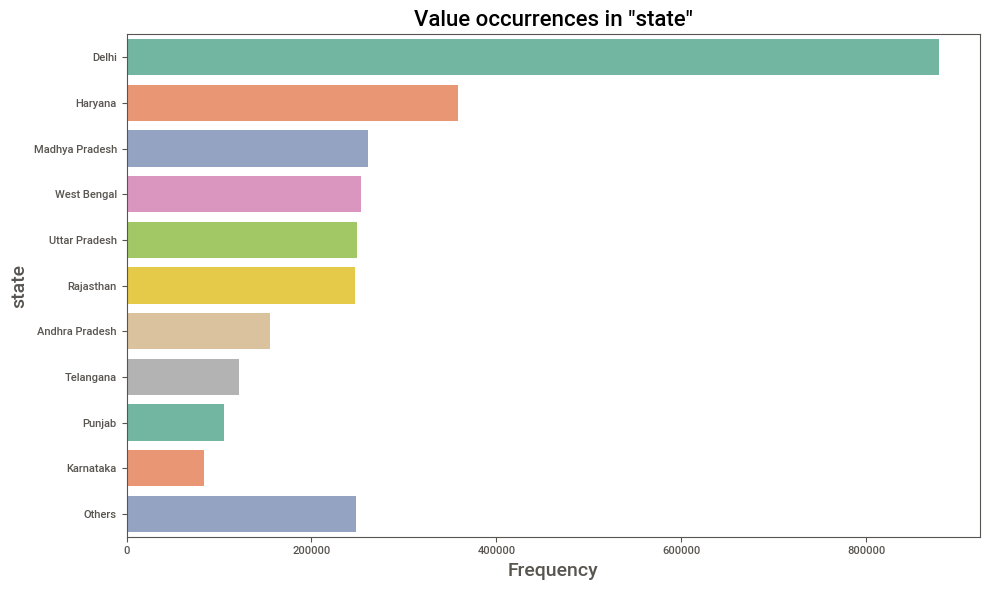

<ipython-input-26-1a7cb3dae9e7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-1a7cb3dae9e7>:16: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


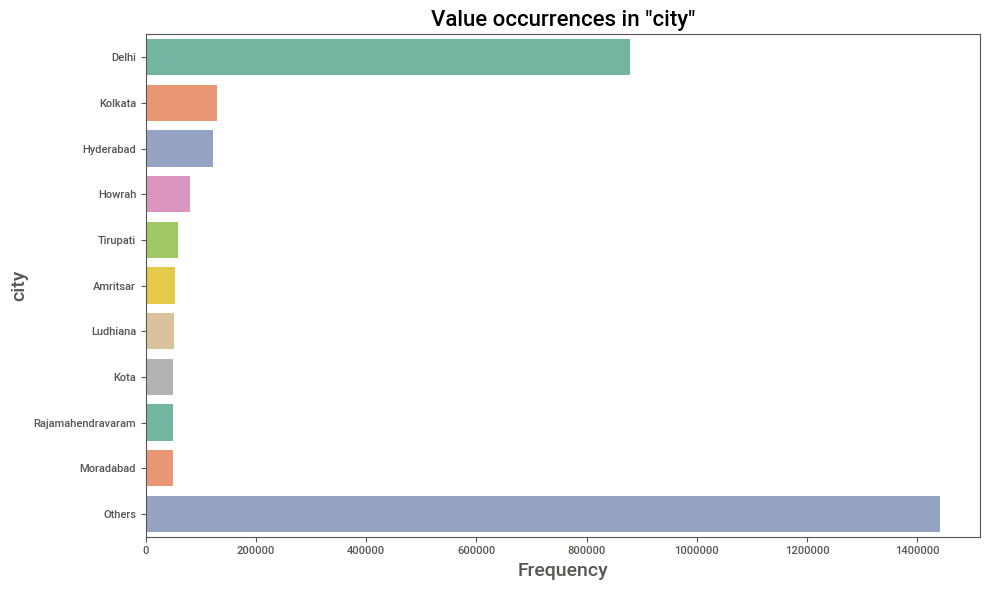

In [26]:
# List of columns to analyze
columns_to_plot = ['state', 'city']

# Set a uniform, non-gradient color palette
palette = sns.color_palette("Set2")  # A set of vibrant colors

# Loop through each column in the list and generate bar plots
for column in columns_to_plot:
    # Reduce the dataset by grouping less frequent categories into "Others"
    reduced_data = prepare_data_with_others(column)

    # Create a new figure with a specified size
    plt.figure(figsize=(10, 6))

    # Generate a bar plot using Seaborn
    sns.barplot(
        y=reduced_data.index,  # Category names (y-axis)
        x=reduced_data.values,  # Corresponding frequencies (x-axis)
        palette=palette[:len(reduced_data)],  # Use a number of colors matching the number of categories
    )

    # Set the title of the plot
    plt.title(f'Value occurrences in "{column}"', fontsize=16)

    # Label the x-axis and y-axis
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel(column, fontsize=14)

    # Adjust layout to prevent overlapping elements
    plt.tight_layout()

    # Save the plot as a high-resolution PNG file
    plt.savefig(f'{column}_distribution_with_others.png', dpi=300)

    # Display the plot
    plt.show()



Plotto numero occorrenze sostante

In [27]:
# List of columns to visualize (air pollutant concentration measurements)
columns_to_plot = [
    'CO (mg/m3)',  # Carbon Monoxide concentration in mg/m³
    'NO (ug/m3)',  # Nitric Oxide concentration in µg/m³
    'NO2 (ug/m3)', # Nitrogen Dioxide concentration in µg/m³
    'Ozone (ug/m3)',  # Ozone concentration in µg/m³
    'PM10 (ug/m3)',  # Particulate Matter 10 concentration in µg/m³
    'PM2.5 (ug/m3)', # Particulate Matter 2.5 concentration in µg/m³
    'SO2 (ug/m3)'  # Sulfur Dioxide concentration in µg/m³
]

# Set a uniform, non-gradient color palette
palette = sns.color_palette("Set2")  # A set of distinct, vibrant colors


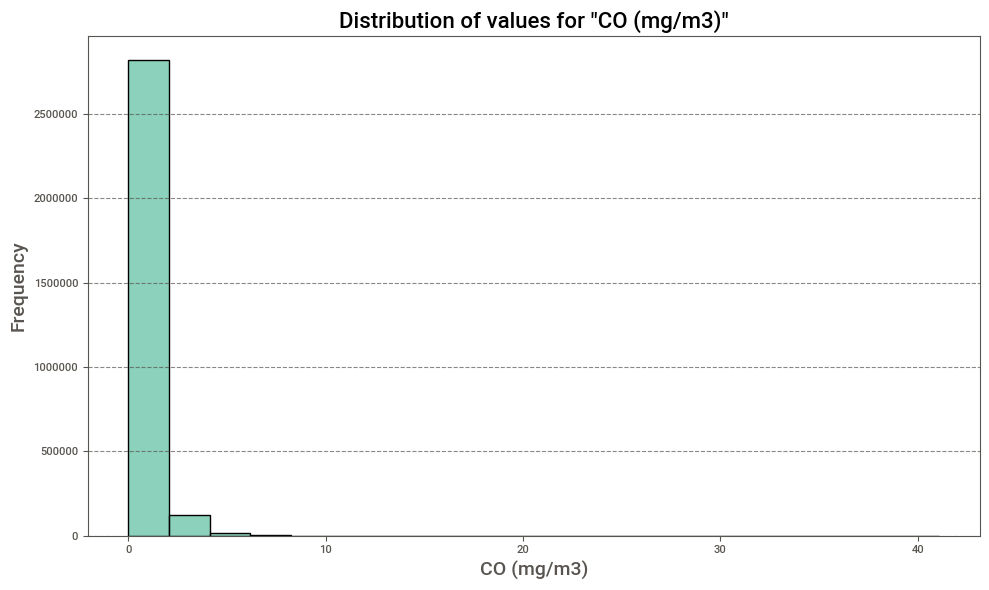

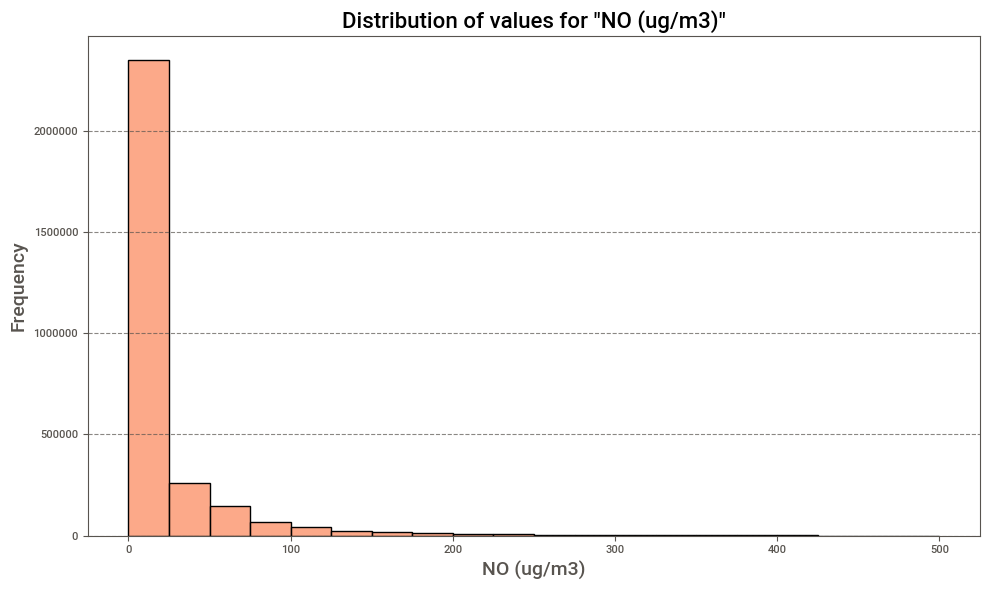

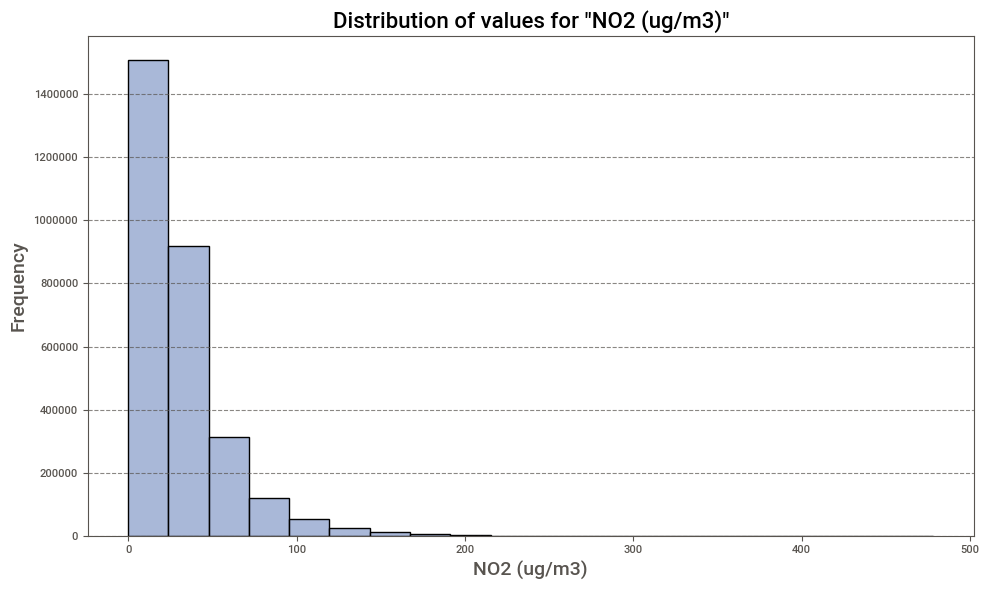

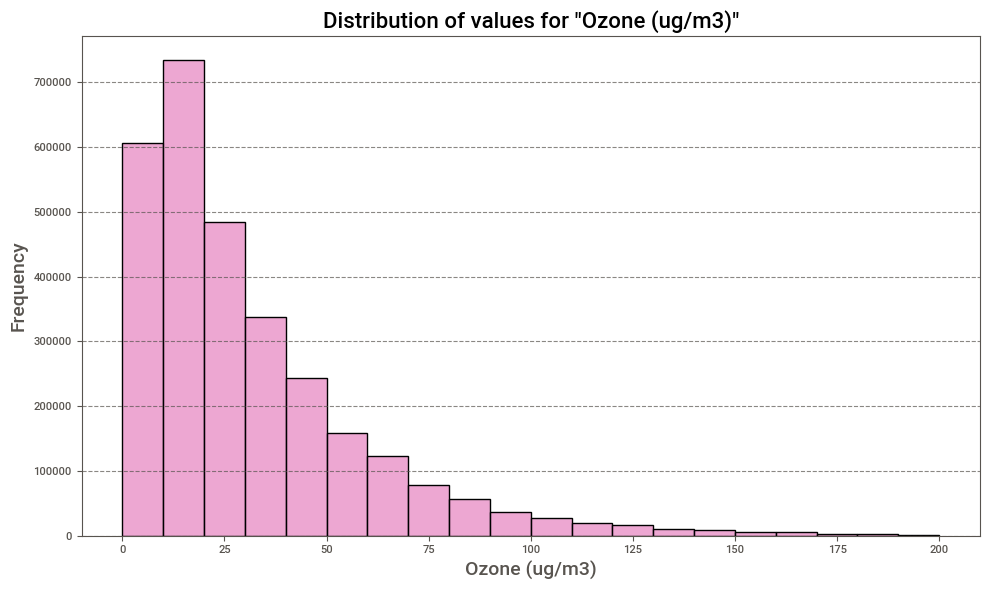

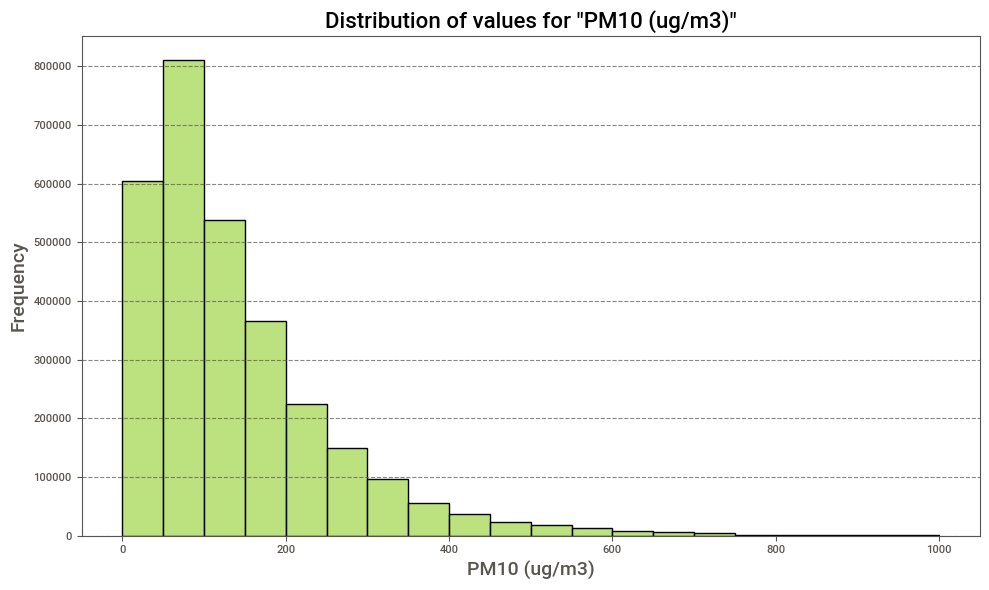

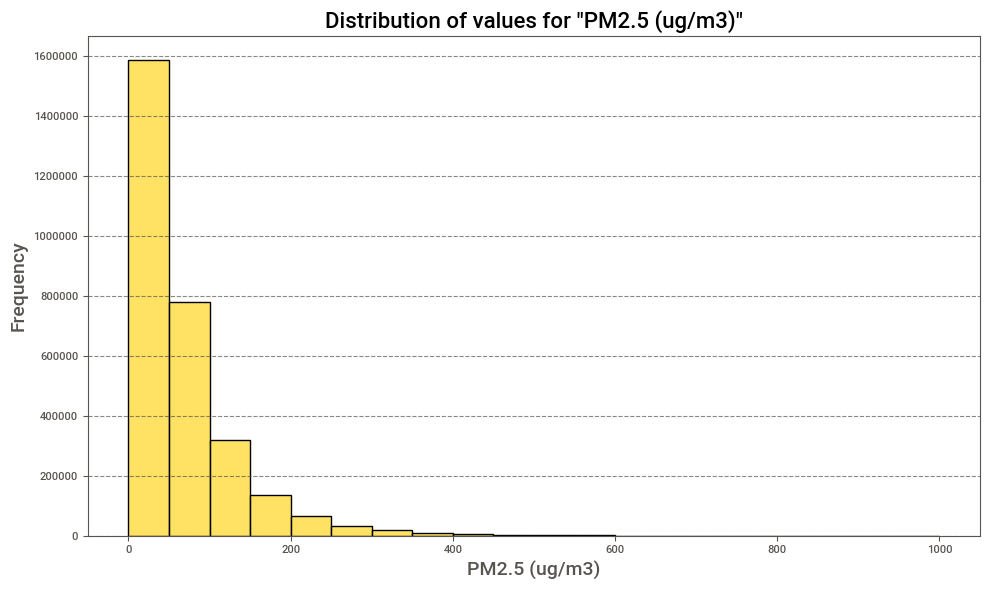

In [ ]:
# Draw a vertical histogram for each pollutant
for i, column in enumerate(columns_to_plot):
    # Create a new figure with a specified size
    plt.figure(figsize=(10, 6))

    # Generate a histogram using Seaborn
    sns.histplot(
        data[column],  # Data for the current pollutant
        bins=20,  # Number of bins for the histogram
        kde=False,  # Disable kernel density estimation (KDE), show only the histogram
        color=palette[i % len(palette)],  # Assign a color from the palette
        edgecolor="black"  # Add black borders to histogram bars for better visibility
    )

    # Set the title of the plot
    plt.title(f'Distribution of values for "{column}"', fontsize=16)

    # Label the x-axis and y-axis
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add a light dashed grid on the y-axis for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent overlapping elements
    plt.tight_layout()

    # Display the plot
    plt.show()
